@Student Name: Garret Molloy
@Student ID: 9021906
@Project Group: 2.3

# Title: Predicting Diabetic Retinopathy

## Using Binary Classification & Logistic Regression

Datasource Name: Diabetic Retinopathy Debrecen Data Set Data Set 
Website: The UCI Machine Learning Repository 
Datasource: http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set#


In [9]:
from pandas import read_csv

df = read_csv("messidor_features.csv")
dataset = df.values

## Data Set Information:

This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. All features represent either a detected lesion, a descriptive feature of a anatomical part or an image-level descriptor. The underlying method image analysis and feature extraction as well as our classification technique is described in Balint Antal, Andras Hajdu: An ensemble-based system for automatic screening of diabetic retinopathy, Knowledge-Based Systems 60 (April 2014), 20-27. 


In [14]:
print( df.head(5))

   id  0  1   2   3   4   5   6   7          8  ...           10        11  \
0   1  1  1  22  22  22  19  18  14  49.895756  ...     5.270920  0.771761   
1   2  1  1  24  24  22  18  16  13  57.709936  ...     3.325423  0.234185   
2   3  1  1  62  60  59  54  47  33  55.831441  ...    12.687485  4.852282   
3   4  1  1  55  53  53  50  43  31  40.467228  ...     9.118901  3.079428   
4   5  1  1  44  44  44  41  39  27  18.026254  ...     0.410381  0.000000   

         12        13        14        15        16        17  18  Class  
0  0.018632  0.006864  0.003923  0.003923  0.486903  0.100025   1      0  
1  0.003903  0.003903  0.003903  0.003903  0.520908  0.144414   0      0  
2  1.393889  0.373252  0.041817  0.007744  0.530904  0.128548   0      1  
3  0.840261  0.272434  0.007653  0.001531  0.483284  0.114790   0      0  
4  0.000000  0.000000  0.000000  0.000000  0.475935  0.123572   0      1  

[5 rows x 21 columns]


In [12]:
print( df['0'].value_counts())

1    1147
0       4
Name: 0, dtype: int64


### Data Pre-Processing

In [16]:
# Remove 'id' field as it contributes nothing

df = df.drop('id',1)

X = df.drop('Class', 1)
y = df.Class

print(X.head(5))
print(y.head(5))


   0  1   2   3   4   5   6   7          8          9         10        11  \
0  1  1  22  22  22  19  18  14  49.895756  17.775994   5.270920  0.771761   
1  1  1  24  24  22  18  16  13  57.709936  23.799994   3.325423  0.234185   
2  1  1  62  60  59  54  47  33  55.831441  27.993933  12.687485  4.852282   
3  1  1  55  53  53  50  43  31  40.467228  18.445954   9.118901  3.079428   
4  1  1  44  44  44  41  39  27  18.026254   8.570709   0.410381  0.000000   

         12        13        14        15        16        17  18  
0  0.018632  0.006864  0.003923  0.003923  0.486903  0.100025   1  
1  0.003903  0.003903  0.003903  0.003903  0.520908  0.144414   0  
2  1.393889  0.373252  0.041817  0.007744  0.530904  0.128548   0  
3  0.840261  0.272434  0.007653  0.001531  0.483284  0.114790   0  
4  0.000000  0.000000  0.000000  0.000000  0.475935  0.123572   0  
0    0
1    0
2    1
3    0
4    1
Name: Class, dtype: int64


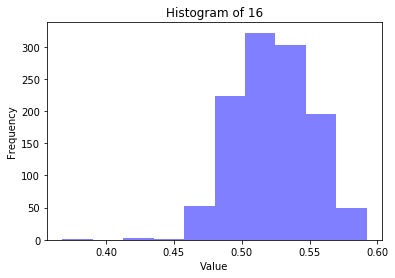

1    1147
0       4
Name: 0, dtype: int64
1    1057
0      94
Name: 1, dtype: int64


In [27]:
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color="blue", alpha=0.5)
    plt.title("Histogram of {}".format(x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
plot_histogram(X['16'])
# print(X['16'].value_counts())

def plot(z):
    plt.title("Plot of Values of {}".format(z.name))
    plt.plot(z)
    plt.show()
    
# df = df[df.line_race != 0]
# df.loc[(df['age'] == 21) & df['favorite_color'].isin(array)]
print( df['0'].value_counts())
print( df['1'].value_counts())

In [42]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

print(X.head(5))

   0  1   2   3   4   5   6   7          8          9         10        11  \
0  1  1  22  22  22  19  18  14  49.895756  17.775994   5.270920  0.771761   
1  1  1  24  24  22  18  16  13  57.709936  23.799994   3.325423  0.234185   
2  1  1  62  60  59  54  47  33  55.831441  27.993933  12.687485  4.852282   
3  1  1  55  53  53  50  43  31  40.467228  18.445954   9.118901  3.079428   
4  1  1  44  44  44  41  39  27  18.026254   8.570709   0.410381  0.000000   

         12        13        14        15        16        17  18  
0  0.018632  0.006864  0.003923  0.003923  0.486903  0.100025   1  
1  0.003903  0.003903  0.003903  0.003903  0.520908  0.144414   0  
2  1.393889  0.373252  0.041817  0.007744  0.530904  0.128548   0  
3  0.840261  0.272434  0.007653  0.001531  0.483284  0.114790   0  
4  0.000000  0.000000  0.000000  0.000000  0.475935  0.123572   0  


In [43]:
import sklearn.feature_selection
from sklearn.model_selection import train_test_split

# Use train_test_split in sklearn.cross_validation to split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

select = sklearn.feature_selection.SelectKBest(k=6)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc




D:\Python\Miniconda\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.8153477619941034


D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
